# Linear Regression

### Importing Lib

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 

### Performing EDA on the dataset

In [21]:
df_0 = pd.read_csv("Student_Performance.csv")
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [22]:
df_1 = df_0[df_0.duplicated()]
df_1.shape

(127, 6)

In [23]:
df_1 = df_0.drop_duplicates()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


In [24]:
df_2 = df_1.rename(columns={"Hours Studied":"HrStd","Previous Scores":"PrevScr","Extracurricular Activities":"ExtraC","Sleep Hours":"Sleep","Sample Question Papers Practiced":"PprPractised","Performance Index":"PerfIndx"})
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HrStd         9873 non-null   int64  
 1   PrevScr       9873 non-null   int64  
 2   ExtraC        9873 non-null   object 
 3   Sleep         9873 non-null   int64  
 4   PprPractised  9873 non-null   int64  
 5   PerfIndx      9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


In [25]:
df_2.isnull().sum()

HrStd           0
PrevScr         0
ExtraC          0
Sleep           0
PprPractised    0
PerfIndx        0
dtype: int64

In [26]:
df_2.isna().sum()

HrStd           0
PrevScr         0
ExtraC          0
Sleep           0
PprPractised    0
PerfIndx        0
dtype: int64

In [33]:
le = LabelEncoder()
df_2.ExtraC = le.fit_transform(df_2.ExtraC)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HrStd         9873 non-null   int64  
 1   PrevScr       9873 non-null   int64  
 2   ExtraC        9873 non-null   int64  
 3   Sleep         9873 non-null   int64  
 4   PprPractised  9873 non-null   int64  
 5   PerfIndx      9873 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 539.9 KB


In [34]:
df_2.head(2)

,HrStd,PrevScr,ExtraC,Sleep,PprPractised,PerfIndx
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_2)


In [42]:
scaled_data = pd.DataFrame(scaled_data)
scaled_data.head()

,0,1,2,3,4,5
0,0.775566,1.706168,1.010078,1.454025,-1.249715,1.862979
1,-0.383205,0.724912,-0.990022,-1.491315,-0.900925,0.509348
2,1.161822,-1.064438,1.010078,0.275889,-0.900925,-0.531907
3,0.003052,-1.006717,1.010078,-0.902247,-0.900925,-1.000471
4,0.775566,0.320865,-0.990022,0.864957,0.145444,0.561411


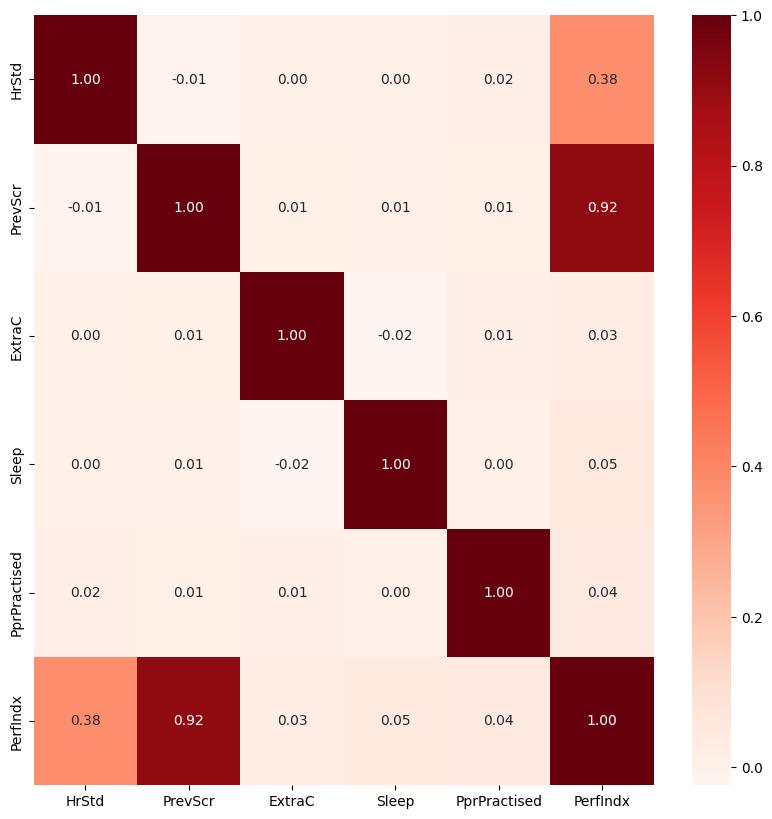

In [38]:
plt.figure(figsize=(10,10))
corr_mat = df_2.corr()
sns.heatmap(corr_mat,cmap="Reds",annot=True,fmt='.2f')
plt.show()

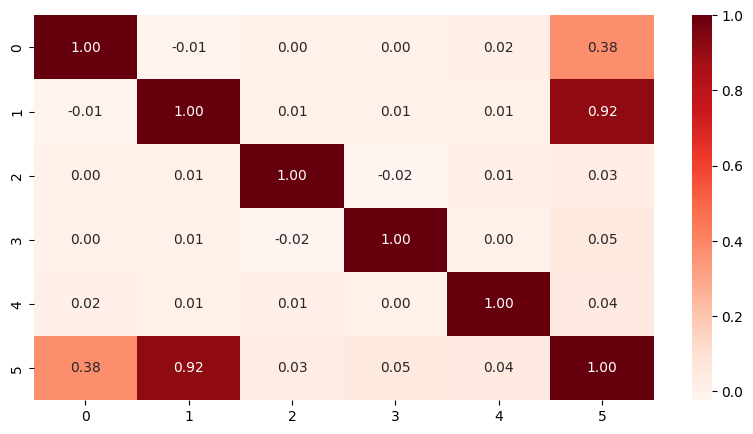

In [44]:
plt.figure(figsize=(10,5))
corr_mat_scale = scaled_data.corr()
sns.heatmap(corr_mat_scale,cmap="Reds",annot=True,fmt='.2f')
plt.show()

In [45]:
X = df_2['PrevScr']
Y = df_2['PerfIndx']

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)


In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [51]:
lr.fit(X_train.values.reshape(-1,1),Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
X_scale = scaled_data[1]
Y_scale = scaled_data[5]
X_train_scale, X_test_scale, Y_train_scale, Y_test_scale = train_test_split(X_scale,Y_scale,test_size=0.25)
lr.fit(X_train_scale.values.reshape(-1,1),Y_train_scale)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
Y_pred = lr.predict(X_test.values.reshape(-1,1))

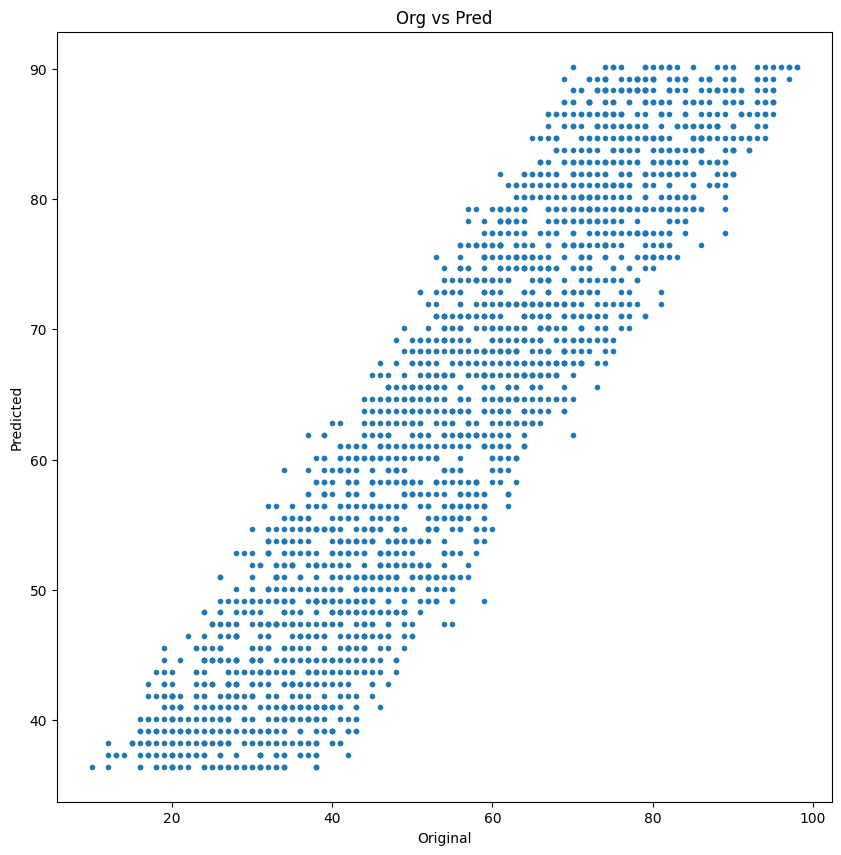

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test,Y_pred,marker='.')
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.title("Org vs Pred")
plt.show()


In [61]:
Y_pred_scale = lr.predict(X_test_scale.values.reshape(-1,1))

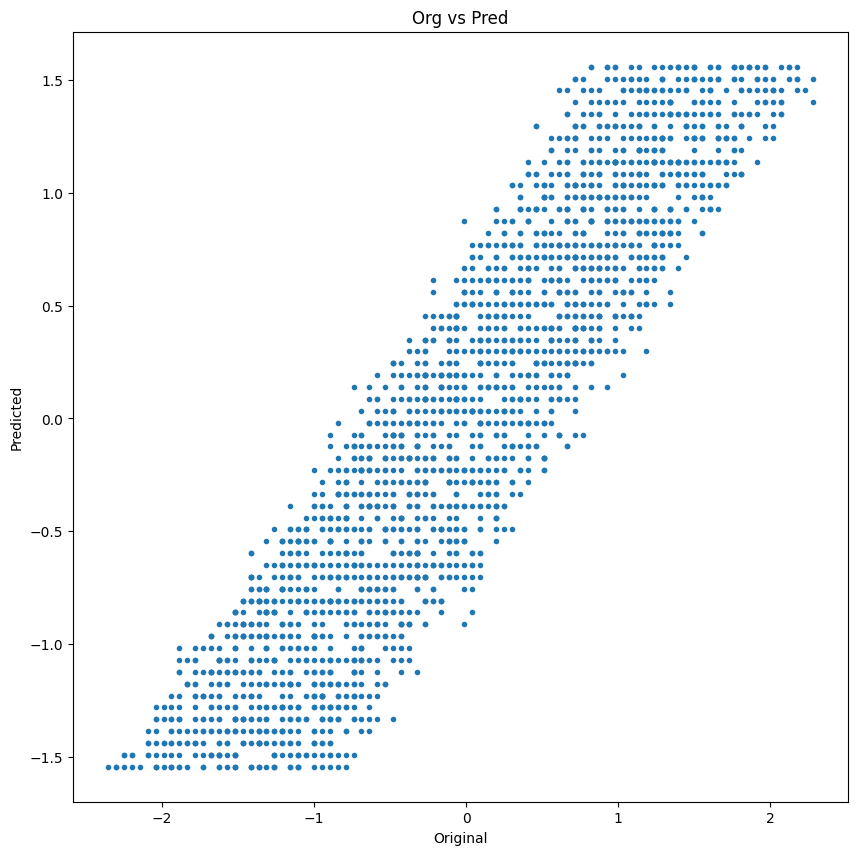

In [62]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test_scale,Y_pred_scale,marker='.')
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.title("Org vs Pred")
plt.show()

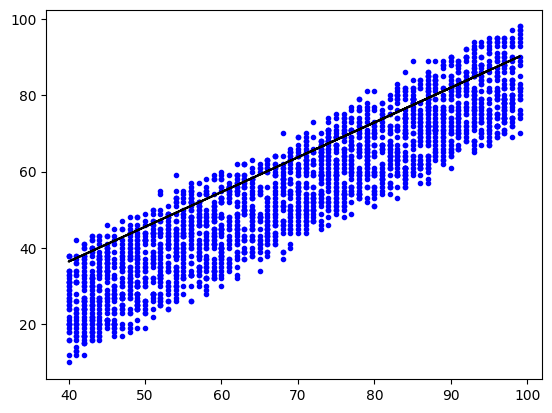

In [64]:
plt.scatter(X_test,Y_test,color='b',marker='.')
plt.plot(X_test,Y_pred,color='k')
plt.show()